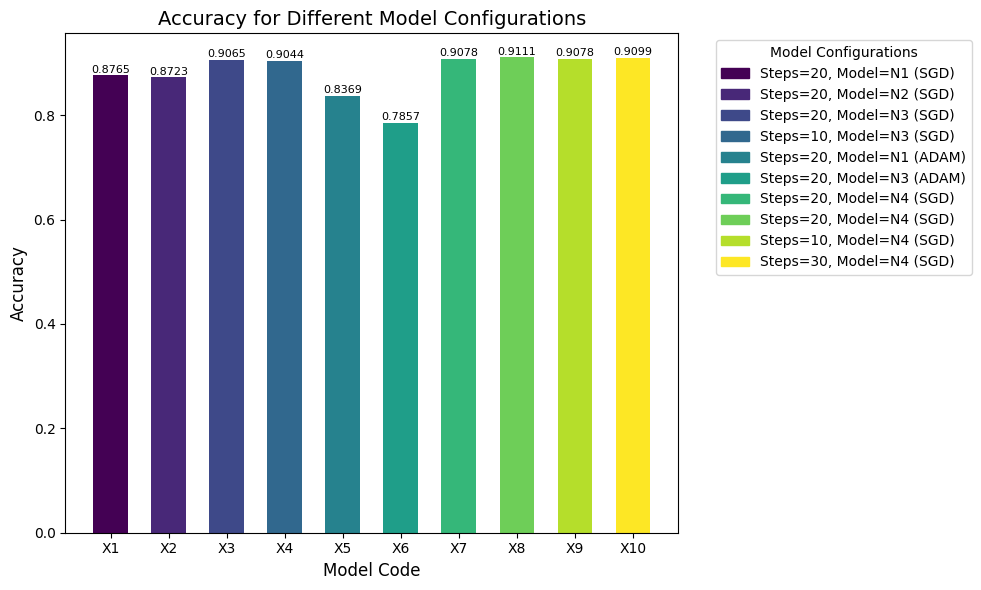

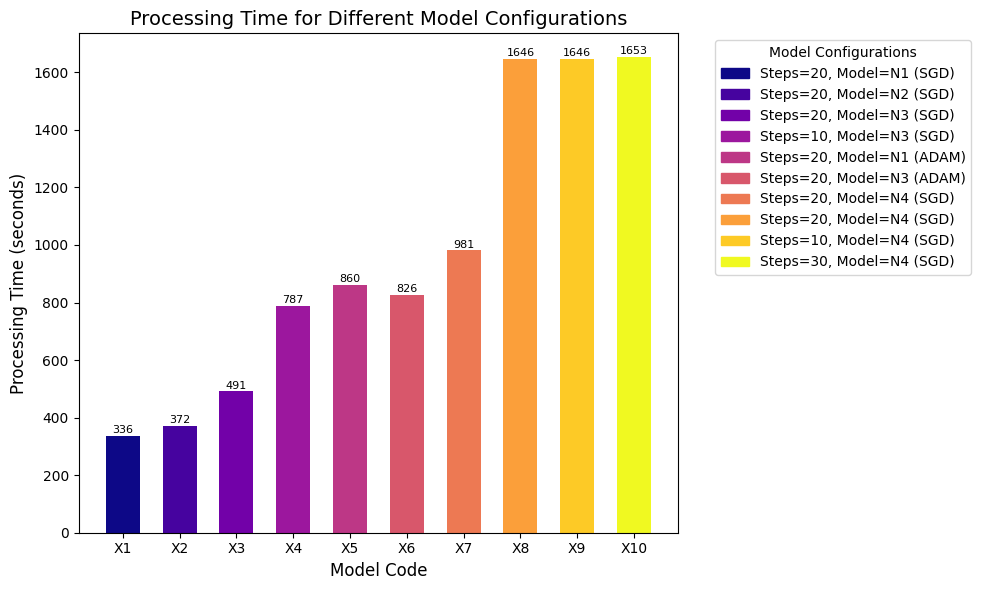

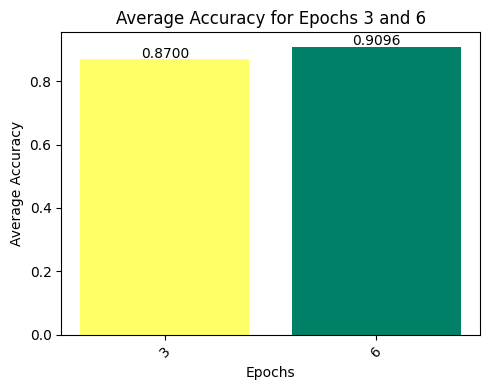

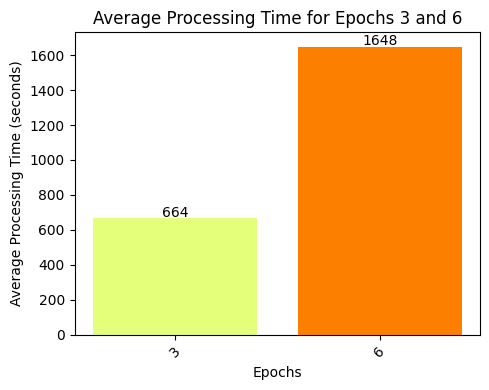

X1: Steps=20, Model=N1, Accuracy=0.8765
X2: Steps=20, Model=N2, Accuracy=0.8723
X3: Steps=20, Model=N3, Accuracy=0.9065
X4: Steps=10, Model=N3, Accuracy=0.9044
X5: Steps=20, Model=N1, Accuracy=0.8369
X6: Steps=20, Model=N3, Accuracy=0.7857
X7: Steps=20, Model=N4, Accuracy=0.9078
X8: Steps=20, Model=N4, Accuracy=0.9111
X9: Steps=10, Model=N4, Accuracy=0.9078
X10: Steps=30, Model=N4, Accuracy=0.9099


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data with N configurations
data = {
    'data_type': ['real'] * 10,
    'steps': [20, 20, 20, 10, 20, 20, 20, 20, 10, 30],
    'model': [
        'N1', 'N2', 'N3', 'N3', 'N1', 'N3',
        'N4', 'N4', 'N4', 'N4'
    ],
    'optimizer': ['SGD', 'SGD', 'SGD', 'SGD', 'ADAM', 'ADAM', 'SGD', 'SGD', 'SGD', 'SGD'],
    'epochs': [3, 3, 3, 3, 3, 3, 3, 6, 6, 6],
    'time': ['5:36', '6:12', '8:11', '13:07', '14:20', '13:46', '16:21', '27:26', '27:26', '27:33'],
    'accuracy': [0.8765, 0.8723, 0.9065, 0.9044, 0.8369, 0.7857, 0.9078, 0.9111, 0.9078, 0.9099]
}

df = pd.DataFrame(data)

# Convert time to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df['time_seconds'] = df['time'].apply(time_to_seconds)

# Create coded labels for each unique configuration
df['code'] = [f"X{i+1}" for i in range(len(df))]  # Generates codes M1, M2, etc.

# Set color map for different models
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
colors_time = plt.cm.plasma(np.linspace(0, 1, len(df)))
colors_time_epoch = plt.cm.Wistia(np.linspace(0, 1, 2))
colors_accuracy_epoch = plt.cm.summer(np.linspace(0, 1, 2))

# Create combined labels for legend including steps, model, and optimizer
legend_labels = [f"Steps={steps}, Model={mod} ({opt})" for steps, mod, opt in zip(df['steps'], df['model'], df['optimizer'])]

# Plotting Accuracy for Different Models
plt.figure(figsize=(10, 6))
bars = plt.bar(df['code'], df['accuracy'], color=colors, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Different Model Configurations', fontsize=14)
for bar, acc in zip(bars, df['accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.4f}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Processing Time for Different Models
plt.figure(figsize=(10, 6))
bars = plt.bar(df['code'], df['time_seconds'], color=colors_time, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Processing Time (seconds)', fontsize=12)
plt.title('Processing Time for Different Model Configurations', fontsize=14)
for bar, time_sec in zip(bars, df['time_seconds']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f"{time_sec}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_time[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate average accuracy and time for each epoch type
avg_data = df.groupby('epochs').agg({'accuracy': 'mean', 'time_seconds': 'mean'}).reset_index()

# Plot average accuracy for different epochs
plt.figure(figsize=(5, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['accuracy'], color=colors_accuracy_epoch[::-1])
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Epochs 3 and 6')
for i, v in enumerate(avg_data['accuracy']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot average processing time for different epochs
plt.figure(figsize=(5, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['time_seconds'], color=colors_time_epoch)
plt.xlabel('Epochs')
plt.ylabel('Average Processing Time (seconds)')
plt.title('Average Processing Time for Epochs 3 and 6')
for i, v in enumerate(avg_data['time_seconds']):
    plt.text(i, v + 10, f"{int(v)}", ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the code with corresponding full configuration
for i, row in df.iterrows():
    print(f"{row['code']}: Steps={row['steps']}, Model={row['model']}, Accuracy={row['accuracy']}")


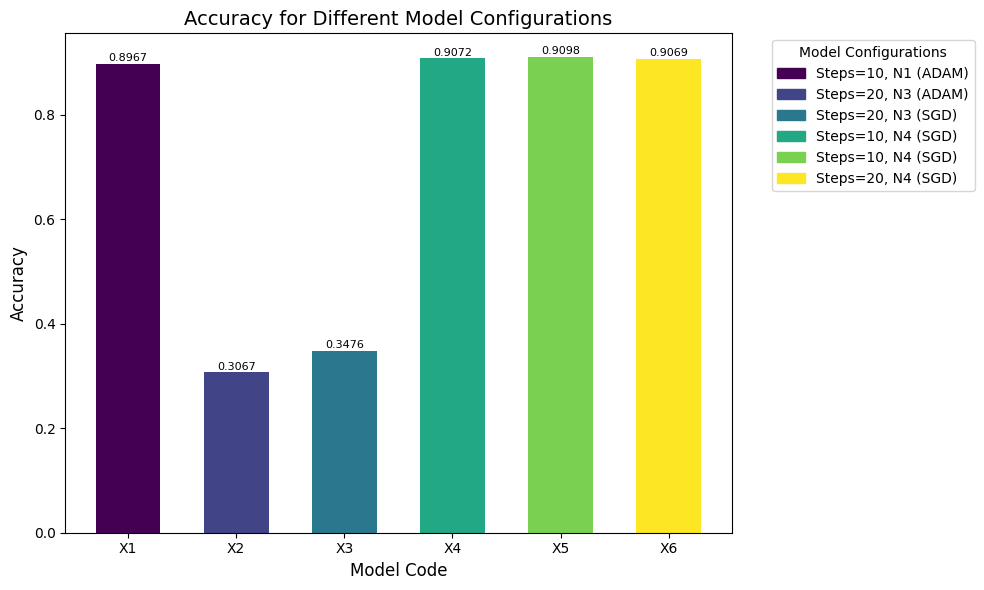

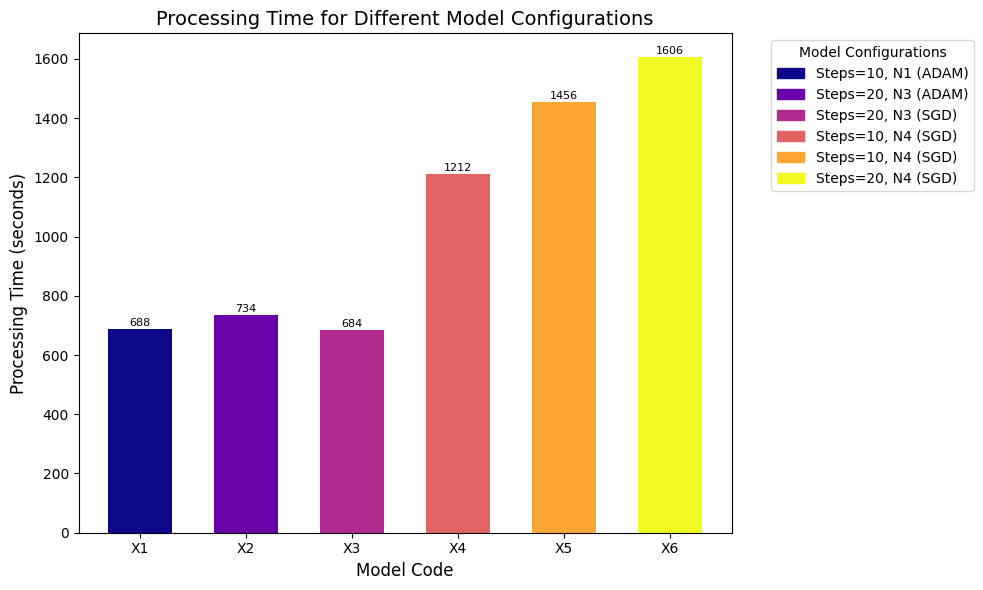

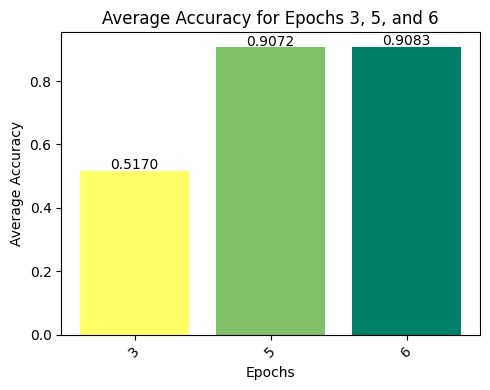

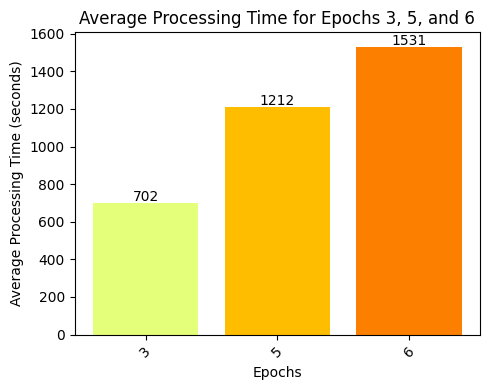

X1: Steps=10, Model=N1, Optimizer=ADAM, Accuracy=0.8967
X2: Steps=20, Model=N3, Optimizer=ADAM, Accuracy=0.3067
X3: Steps=20, Model=N3, Optimizer=SGD, Accuracy=0.3476
X4: Steps=10, Model=N4, Optimizer=SGD, Accuracy=0.9072
X5: Steps=10, Model=N4, Optimizer=SGD, Accuracy=0.9098
X6: Steps=20, Model=N4, Optimizer=SGD, Accuracy=0.9069


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# New data
data = {
    'data_type': ['real'] * 6,
    'steps': [10, 20, 20, 10, 10, 20],
    'model': ['N1', 'N3', 'N3', 'N4', 'N4', 'N4'],  # کدهای مدل‌ها به‌جای encoder/decoder
    'optimizer': ['ADAM', 'ADAM', 'SGD', 'SGD', 'SGD', 'SGD'],
    'epochs': [3, 3, 3, 5, 6, 6],
    'time': ['11:28', '12:14', '11:24', '20:12', '24:16', '26:46'],
    'accuracy': [0.8967, 0.3067, 0.3476, 0.9072, 0.9098, 0.9069]
}

df = pd.DataFrame(data)

# Convert time to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df['time_seconds'] = df['time'].apply(time_to_seconds)

# Generate code labels for configurations
df['code'] = [f"X{i+1}" for i in range(len(df))]  # Generates codes M1, M2, etc.

# Define color map for each unique model configuration
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
colors_time = plt.cm.plasma(np.linspace(0, 1, len(df)))
colors_time_epoch = plt.cm.Wistia(np.linspace(0, 1, 3))
colors_accuracy_epoch = plt.cm.summer(np.linspace(0, 1, 3))

# Create labels for legend based on steps and optimizer
legend_labels = [f"Steps={steps}, {model} ({opt})" for steps, model, opt in zip(df['steps'], df['model'], df['optimizer'])]

# Plotting Accuracy for Different Models
plt.figure(figsize=(10, 6))
bars = plt.bar(df['code'], df['accuracy'], color=colors, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Different Model Configurations', fontsize=14)
for bar, acc in zip(bars, df['accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.4f}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Processing Time for Different Models
plt.figure(figsize=(10, 6))
bars = plt.bar(df['code'], df['time_seconds'], color=colors_time, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Processing Time (seconds)', fontsize=12)
plt.title('Processing Time for Different Model Configurations', fontsize=14)
for bar, time_sec in zip(bars, df['time_seconds']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f"{time_sec}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_time[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate average accuracy and time for each epoch type
avg_data = df.groupby('epochs').agg({'accuracy': 'mean', 'time_seconds': 'mean'}).reset_index()

# Plot average accuracy for different epochs
plt.figure(figsize=(5, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['accuracy'], color=colors_accuracy_epoch[::-1])
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Epochs 3, 5, and 6')
for i, v in enumerate(avg_data['accuracy']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot average processing time for different epochs
plt.figure(figsize=(5, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['time_seconds'], color=colors_time_epoch)
plt.xlabel('Epochs')
plt.ylabel('Average Processing Time (seconds)')
plt.title('Average Processing Time for Epochs 3, 5, and 6')
for i, v in enumerate(avg_data['time_seconds']):
    plt.text(i, v + 10, f"{int(v)}", ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the code with corresponding full configuration
for i, row in df.iterrows():
    print(f"{row['code']}: Steps={row['steps']}, Model={row['model']}, Optimizer={row['optimizer']}, Accuracy={row['accuracy']}")


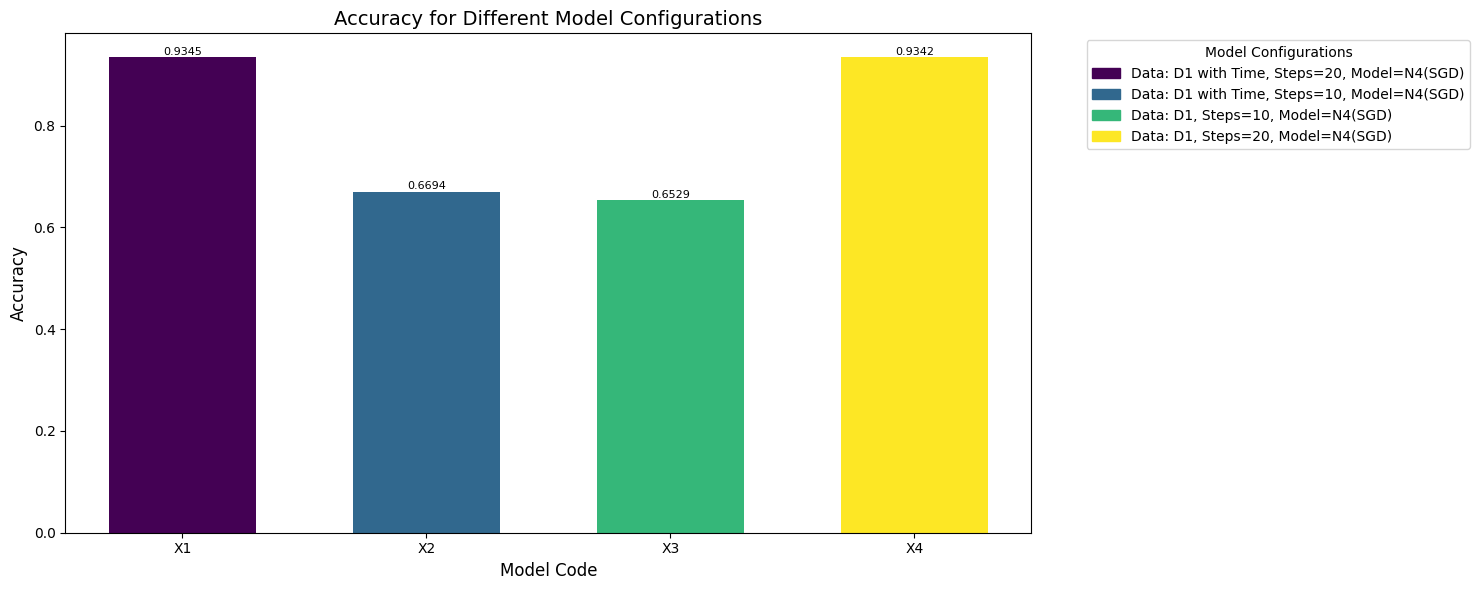

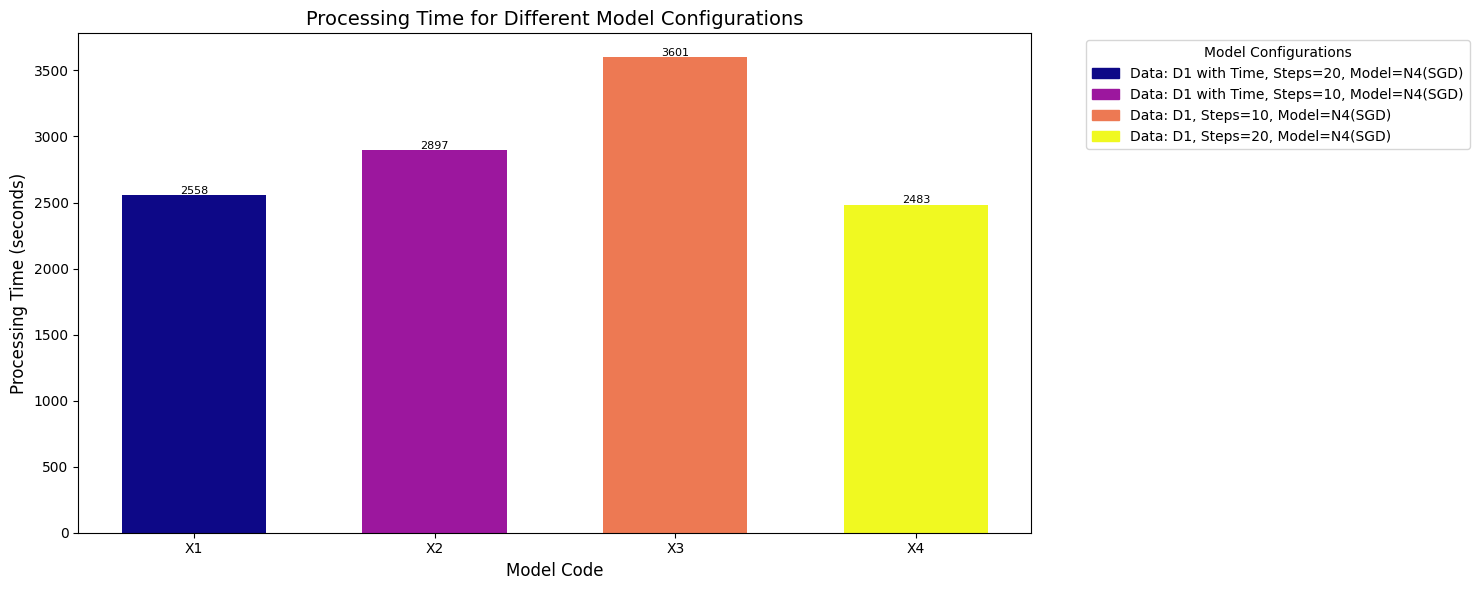

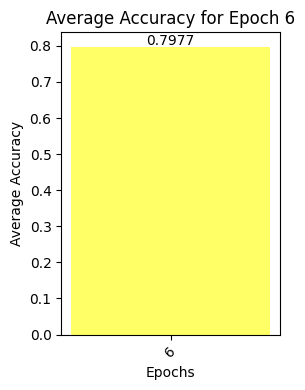

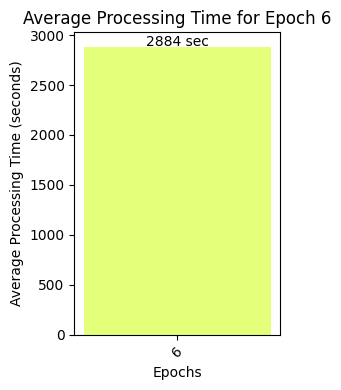

X1: Steps=20, Model=N4, Data=D1 with Time, Accuracy=0.9345
X2: Steps=10, Model=N4, Data=D1 with Time, Accuracy=0.6694
X3: Steps=10, Model=N4, Data=D1, Accuracy=0.6529
X4: Steps=20, Model=N4, Data=D1, Accuracy=0.9342


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# New data including the "Data Type" column in English
data = {
    'data_type': ['real'] * 4,
    'steps': [20, 10, 10, 20],
    'model': ['N4', 'N4', 'N4', 'N4'],  # Model codes replacing encoder/decoder
    'optimizer': ['SGD', 'SGD', 'SGD', 'SGD'],
    'epochs': [6, 6, 6, 6],
    'time': ['42:38', '48:17', '60:01', '41:23'],
    'accuracy': [0.9345, 0.6694, 0.6529, 0.9342],
    'data': [
        "D1 with Time",  # D1: Aggregation of Similar Nodes with Time
        "D1 with Time",
        "D1",  # D1: Aggregation of Similar Nodes
        "D1"   # D1: Aggregation of Similar Nodes
    ]
}

df = pd.DataFrame(data)

# Convert time to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df['time_seconds'] = df['time'].apply(time_to_seconds)

# Create coded labels for each unique configuration
df['code'] = [f"X{i+1}" for i in range(len(df))]  # Generates codes M1, M2, etc.

# Set color map for different models
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
colors_time = plt.cm.plasma(np.linspace(0, 1, len(df)))
colors_time_epoch = plt.cm.Wistia(np.linspace(0, 1, 3))
colors_accuracy_epoch = plt.cm.summer(np.linspace(0, 1, 3))

# Create combined labels for legend including data, steps, model, and optimizer
legend_labels = [
    f"Data: {data}, Steps={steps}, Model={model}({opt})"
    for data, steps, model, opt in zip(df['data'], df['steps'], df['model'], df['optimizer'])
]

# Plotting Accuracy for Different Models
plt.figure(figsize=(15, 6))
bars = plt.bar(df['code'], df['accuracy'], color=colors, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Different Model Configurations', fontsize=14)
for bar, acc in zip(bars, df['accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.4f}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Processing Time for Different Models
plt.figure(figsize=(15, 6))
bars = plt.bar(df['code'], df['time_seconds'], color=colors_time, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Processing Time (seconds)', fontsize=12)
plt.title('Processing Time for Different Model Configurations', fontsize=14)
for bar, time_sec in zip(bars, df['time_seconds']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f"{time_sec}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_time[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate average accuracy and time for each epoch type
avg_data = df.groupby('epochs').agg({'accuracy': 'mean', 'time_seconds': 'mean'}).reset_index()

# Plot average accuracy for different epochs
plt.figure(figsize=(3, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['accuracy'], color=colors_accuracy_epoch[::-1])
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Epoch 6')
for i, v in enumerate(avg_data['accuracy']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot average processing time for different epochs
plt.figure(figsize=(3, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['time_seconds'], color=colors_time_epoch)
plt.xlabel('Epochs')
plt.ylabel('Average Processing Time (seconds)')
plt.title('Average Processing Time for Epoch 6')
for i, v in enumerate(avg_data['time_seconds']):
    plt.text(i, v + 10, f"{int(v)} sec", ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the code with corresponding full configuration
for i, row in df.iterrows():
    print(f"{row['code']}: Steps={row['steps']}, Model={row['model']}, Data={row['data']}, Accuracy={row['accuracy']}")


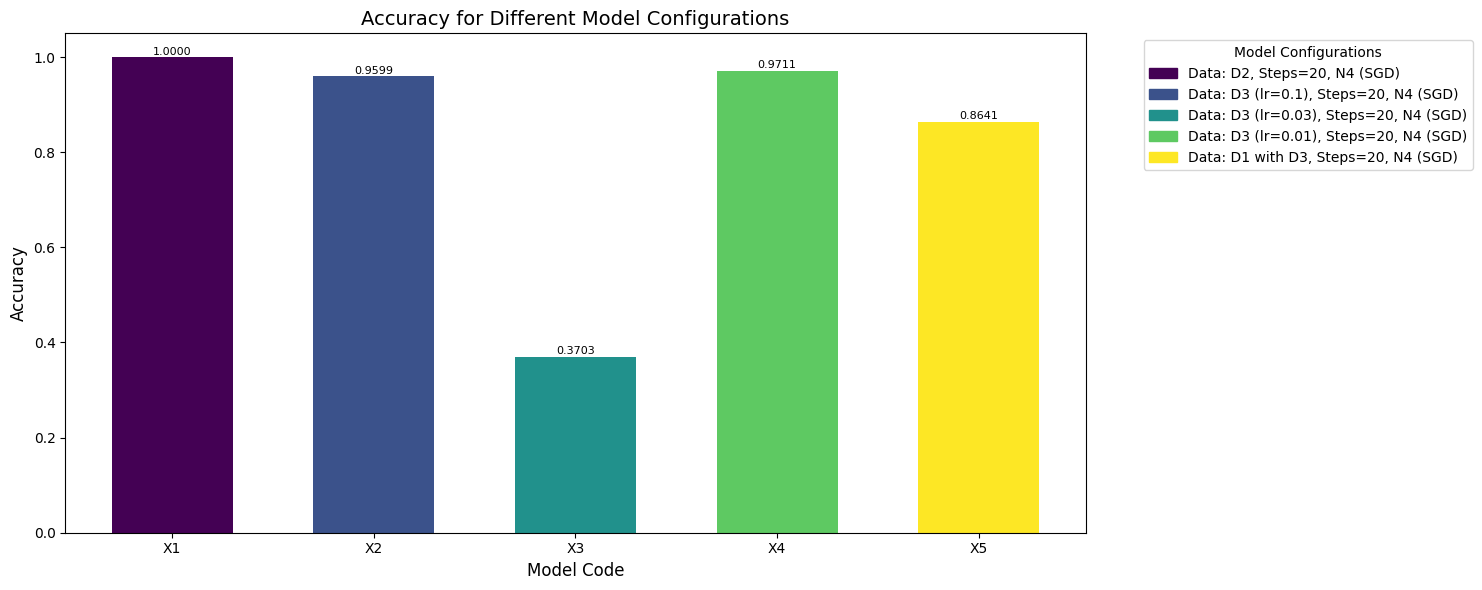

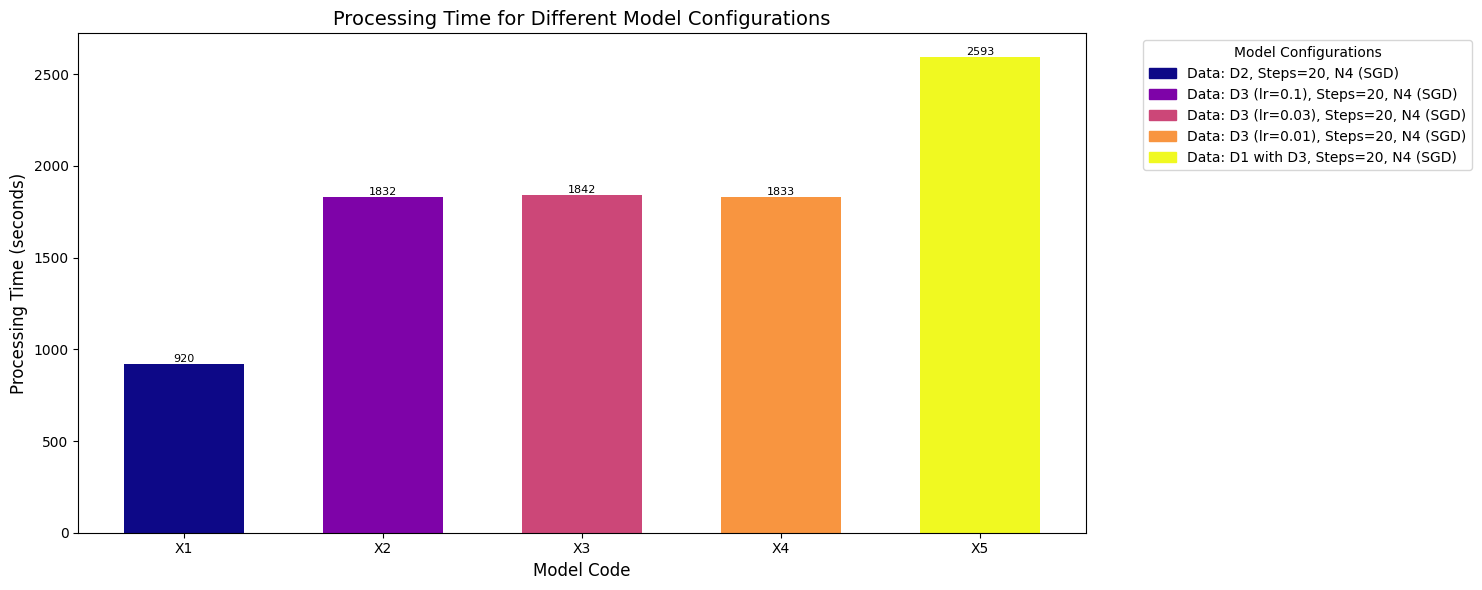

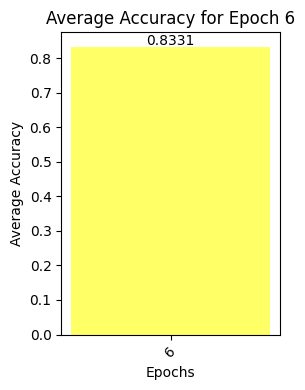

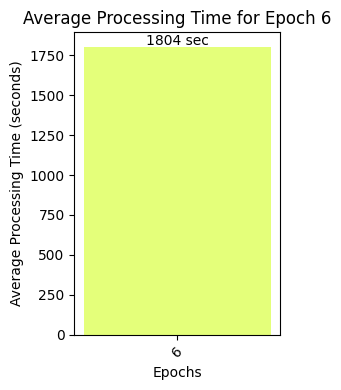

X1: Steps=20, Model=N4, Accuracy=1.0, Data=D2
X2: Steps=20, Model=N4, Accuracy=0.9599, Data=D3 (lr=0.1)
X3: Steps=20, Model=N4, Accuracy=0.3703, Data=D3 (lr=0.03)
X4: Steps=20, Model=N4, Accuracy=0.9711, Data=D3 (lr=0.01)
X5: Steps=20, Model=N4, Accuracy=0.86413, Data=D1 with D3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Updated data including the provided values
data = {
    'data_type': ['real'] * 5,
    'steps': [20] * 5,
    'model': ['N4', 'N4', 'N4', 'N4', 'N4'],  # Updated model codes based on the provided descriptions
    'optimizer': ['SGD'] * 5,
    'epochs': [6] * 5,
    'time': ['15:20', '30:32', '30:42', '30:33', '43:13'],
    'accuracy': [1.0, 0.9599, 0.3703, 0.9711, 0.86413],
    'data': [
        "D2",  # Updated data descriptions with codes
        "D3 (lr=0.1)",
        "D3 (lr=0.03)",
        "D3 (lr=0.01)",
        "D1 with D3"   # Updated to include D1 code
    ]
}

df = pd.DataFrame(data)

# Convert time to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df['time_seconds'] = df['time'].apply(time_to_seconds)

# Create coded labels for each unique configuration
df['code'] = [f"X{i+1}" for i in range(len(df))]  # Generates codes M1, M2, etc.

# Set color map for different models
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
colors_time = plt.cm.plasma(np.linspace(0, 1, len(df)))
colors_time_epoch = plt.cm.Wistia(np.linspace(0, 1, 3))
colors_accuracy_epoch = plt.cm.summer(np.linspace(0, 1, 3))

# Create combined labels for legend
legend_labels = [
    f"Data: {data}, Steps={steps}, {model} ({opt})"
    for data, steps, model, opt in zip(df['data'], df['steps'], df['model'], df['optimizer'])
]

# Plotting Accuracy for Different Models
plt.figure(figsize=(15, 6))
bars = plt.bar(df['code'], df['accuracy'], color=colors, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Different Model Configurations', fontsize=14)
for bar, acc in zip(bars, df['accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.4f}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Processing Time for Different Models
plt.figure(figsize=(15, 6))
bars = plt.bar(df['code'], df['time_seconds'], color=colors_time, width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Processing Time (seconds)', fontsize=12)
plt.title('Processing Time for Different Model Configurations', fontsize=14)
for bar, time_sec in zip(bars, df['time_seconds']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f"{time_sec}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_time[i]) for i in range(len(df))]
plt.legend(handles, legend_labels, title="Model Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate average accuracy and time for each epoch type
avg_data = df.groupby('epochs').agg({'accuracy': 'mean', 'time_seconds': 'mean'}).reset_index()

# Plot average accuracy for different epochs
plt.figure(figsize=(3, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['accuracy'], color=colors_accuracy_epoch[::-1])
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Epoch 6')
for i, v in enumerate(avg_data['accuracy']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot average processing time for different epochs
plt.figure(figsize=(3, 4))
plt.bar(avg_data['epochs'].astype(str), avg_data['time_seconds'], color=colors_time_epoch)
plt.xlabel('Epochs')
plt.ylabel('Average Processing Time (seconds)')
plt.title('Average Processing Time for Epoch 6')
for i, v in enumerate(avg_data['time_seconds']):
    plt.text(i, v + 10, f"{int(v)} sec", ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the code with corresponding full configuration
for i, row in df.iterrows():
    print(f"{row['code']}: Steps={row['steps']}, Model={row['model']}, Accuracy={row['accuracy']}, Data={row['data']}")


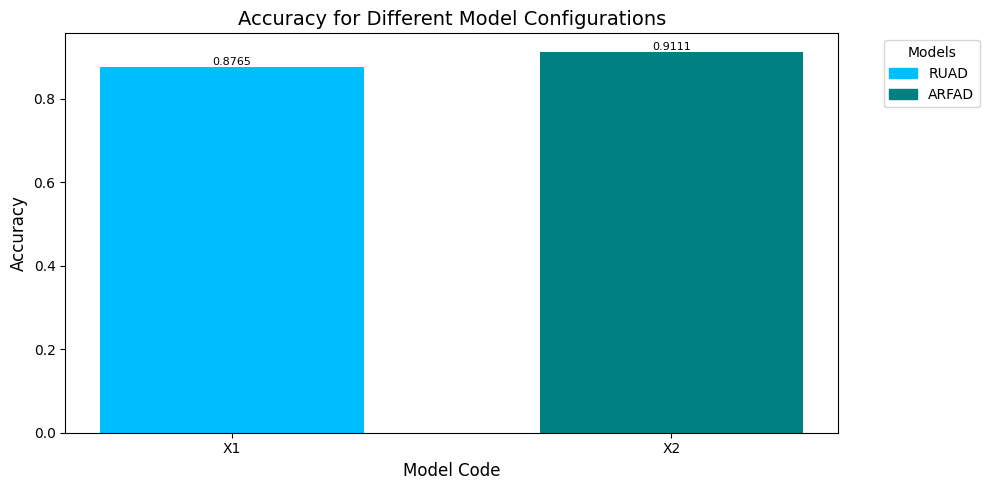

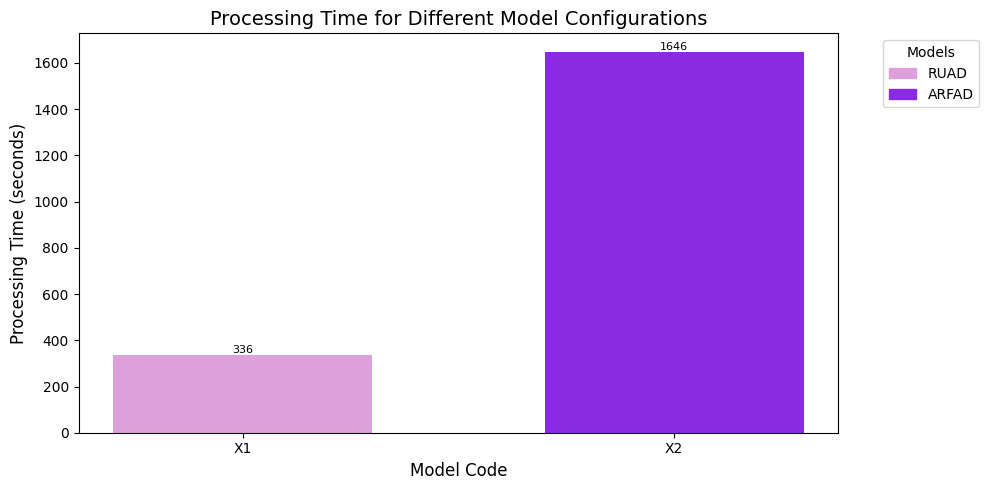

X1: Model=RUAD, Encoder=2 LSTM layers, Decoder=2 fully connected layers, Accuracy=0.8765, Time=5:36
X2: Model=ARFAD, Encoder=3 LSTM layers (hidden transfer), Decoder=3 LSTM layers (hidden transfer), Accuracy=0.9111, Time=27:26


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# New data including the translated columns
data = {
    'model_name': ['RUAD', 'ARFAD'],
    'encoder_model': [
        '2 LSTM layers',
        '3 LSTM layers (hidden transfer)'
    ],
    'decoder_model': [
        '2 fully connected layers',
        '3 LSTM layers (hidden transfer)'
    ],
    'time': ['5:36', '27:26'],
    'accuracy': [0.8765, 0.9111]
}

df = pd.DataFrame(data)

# Convert time to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df['time_seconds'] = df['time'].apply(time_to_seconds)

# Create coded labels for each unique configuration
df['code'] = [f"X{i+1}" for i in range(len(df))]  # Generates codes M1, M2, etc.

# Set color maps for different models
colors_ruad = ['#00BFFF', '#DDA0DD' ]  # Light green and purple for RUAD
colors_arfad = ['#008080', '#8A2BE2']  # Sky blue and light purple for ARFAD

# Create combined labels for legend
legend_labels = [
    f"Model: {name}, Encoder: {enc}, Decoder: {dec}"
    for name, enc, dec in zip(df['model_name'], df['encoder_model'], df['decoder_model'])
]

# Plotting Accuracy for Different Models
plt.figure(figsize=(10, 5))
bars = plt.bar(df['code'], df['accuracy'], color=[colors_ruad[0] if model == 'RUAD' else colors_arfad[0] for model in df['model_name']], width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for Different Model Configurations', fontsize=14)
for bar, acc in zip(bars, df['accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.4f}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_ruad[0]), plt.Rectangle((0, 0), 1, 1, color=colors_arfad[0])]
plt.legend(handles, ['RUAD', 'ARFAD'], title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Processing Time for Different Models
plt.figure(figsize=(10, 5))
bars = plt.bar(df['code'], df['time_seconds'], color=[colors_ruad[1] if model == 'RUAD' else colors_arfad[1] for model in df['model_name']], width=0.6)
plt.xlabel('Model Code', fontsize=12)
plt.ylabel('Processing Time (seconds)', fontsize=12)
plt.title('Processing Time for Different Model Configurations', fontsize=14)
for bar, time_sec in zip(bars, df['time_seconds']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f"{time_sec}", ha='center', fontsize=8)

# Add legend for model types
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_ruad[1]), plt.Rectangle((0, 0), 1, 1, color=colors_arfad[1])]
plt.legend(handles, ['RUAD', 'ARFAD'], title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Displaying the code with corresponding full configuration
for i, row in df.iterrows():
    print(f"{row['code']}: Model={row['model_name']}, Encoder={row['encoder_model']}, Decoder={row['decoder_model']}, Accuracy={row['accuracy']:.4f}, Time={row['time']}")
